In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import chart_studio.plotly as py
import cufflinks as cf

import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

from itertools import cycle

# untuk visualisasi bar_chart_race, import berikut.
import bar_chart_race as brc

# untuk membuat ploting dapat berjalan secara offline, maka lakukan sebagai berikut.
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

warnings.filterwarnings('ignore')

In [119]:
df = pd.read_csv('supermarket_sales.csv')
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

## **1. Belajar Visualisasi Menggunakan Bar_Chart_Race** 

In [3]:
test = df[['Date', 'City', 'Total']]
test.set_index('Date', inplace=True)
test.head()

City     Total
Date                          
1/5/2019      Yangon  548.9715
3/8/2019   Naypyitaw   80.2200
3/3/2019      Yangon  340.5255
1/27/2019     Yangon  489.0480
2/8/2019      Yangon  634.3785

In [4]:
test = pd.get_dummies(data=test)
test.head()

Total  City_Mandalay  City_Naypyitaw  City_Yangon
Date                                                           
1/5/2019   548.9715              0               0            1
3/8/2019    80.2200              0               1            0
3/3/2019   340.5255              0               0            1
1/27/2019  489.0480              0               0            1
2/8/2019   634.3785              0               0            1

In [5]:
test['City_Yangon'] = test['Total'] * test['City_Yangon']
test['City_Mandalay'] = test['Total'] * test['City_Mandalay']
test['City_Naypyitaw'] = test['Total'] * test['City_Naypyitaw']

In [6]:
test.sort_index(ascending=True, inplace=True)
test.reset_index(inplace=True)

In [7]:
test = test.groupby(['Date'])['City_Mandalay', 'City_Naypyitaw', 'City_Yangon'].sum()

# saya coba untuk simulasikan menggunakan bar_chart_race

brc.bar_chart_race(df=test, title='Pemasukan Berdasarkan Kota Asal', 
                   bar_size=0.2, fixed_max=True, dpi=200)

## **2. Belajar Visualisasi Menggunakan Plotly**

### **a. Customer Characteristics**

In [120]:
df.head()

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

In [121]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

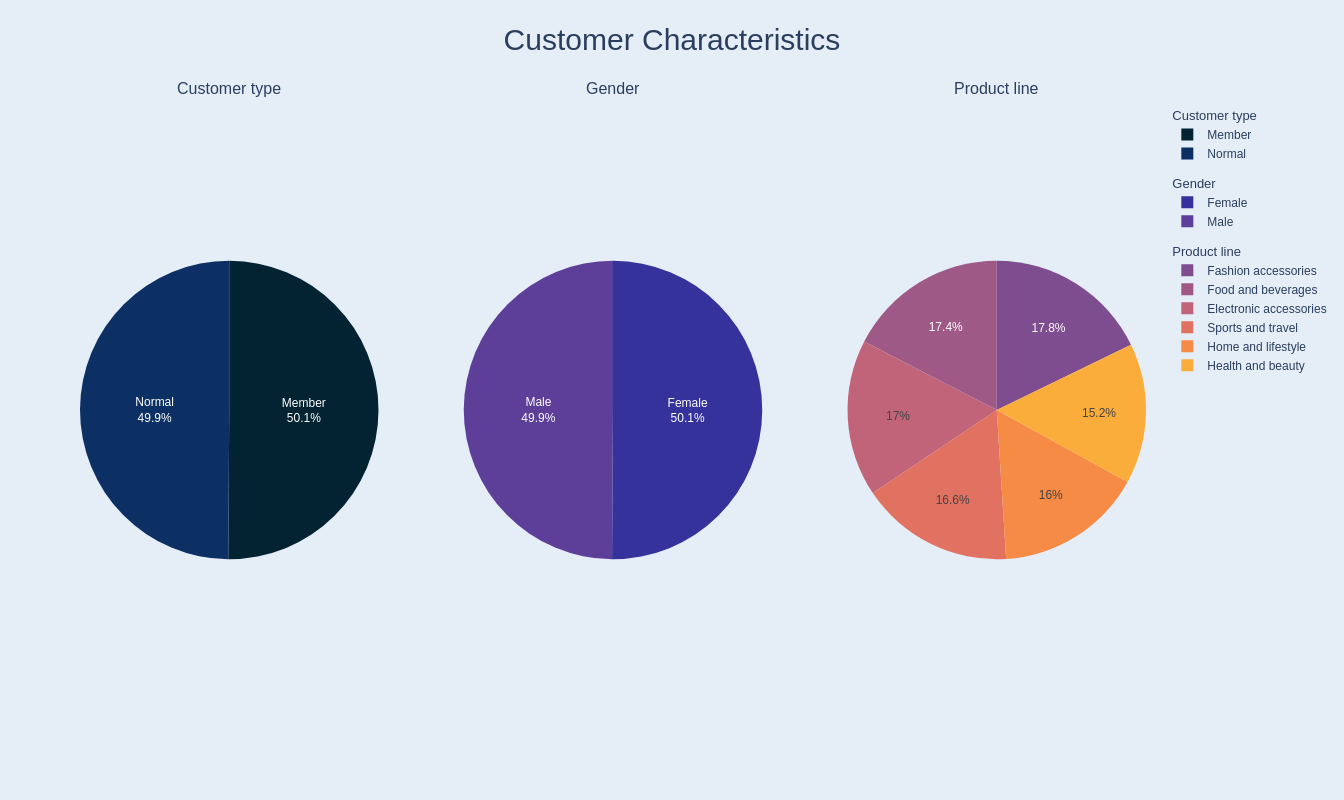

In [122]:
palette = cycle(px.colors.sequential.thermal)

fig = sp.make_subplots(
    rows=1, 
    cols=3,
    horizontal_spacing=0.08,
    subplot_titles=[
        "Customer type",
        "Gender",
        "Product line"],
    specs=[[{"type": "pie"}, {"type": "pie"}, {"type": "pie"}]],
        vertical_spacing = 0.1
)

customer_type_counts = df['Customer type'].value_counts()

customer_type = go.Pie(
    labels=customer_type_counts.index,
    values=customer_type_counts,
    name="Customer type",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(customer_type_counts))],
    legendgroup="Customer type",
    legendgrouptitle_text="Customer type",
)


gender_counts = df.Gender.value_counts()

gender = go.Pie(
    labels=gender_counts.index,
    values=gender_counts,
    name="Gender",
    textinfo='percent+label',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(gender_counts))],
    legendgroup="Gender",
    legendgrouptitle_text="Gender",
)


product_line_counts = df['Product line'].value_counts()

product_line = go.Pie(
    labels=product_line_counts.index,
    values=product_line_counts,
    name="Product line",
    textinfo='percent',
    hoverinfo="label+value+percent",
    marker_colors=[next(palette) for i in range(len(product_line_counts))],
    legendgroup="Product line",
    legendgrouptitle_text="Product line",
)


fig.add_trace(customer_type, row=1, col=1)
fig.add_trace(gender, row=1, col=2)
fig.add_trace(product_line, row=1, col=3)


fig.update_layout(
    template="plotly",
    height=800,
)

fig.update(
    layout_title_text="Customer Characteristics",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

### **b. Product Sales by Product Line and by Gender**

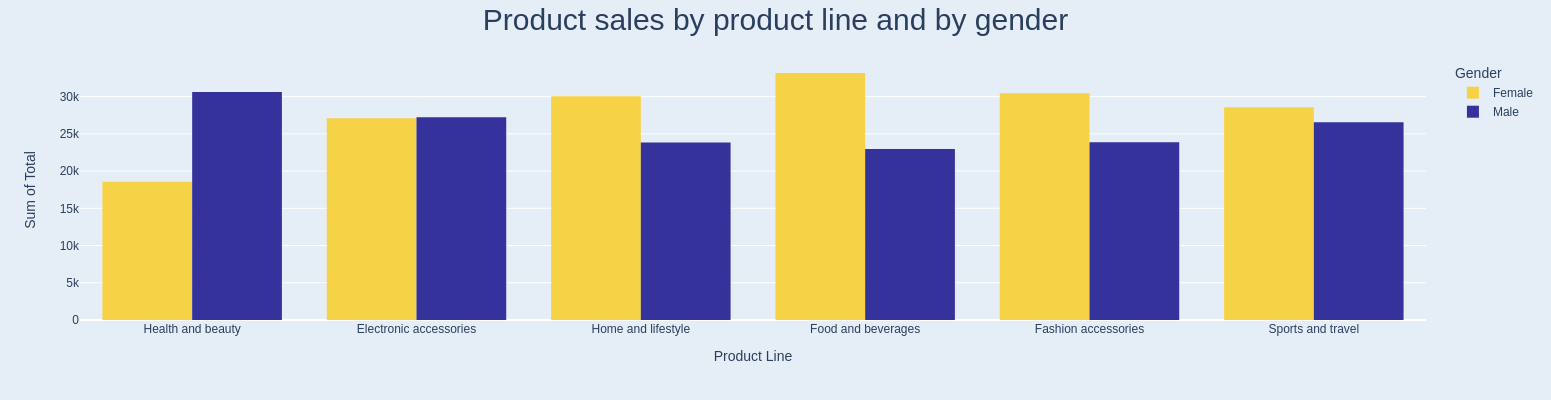

In [123]:
fig = px.histogram(data_frame=df, 
                   x='Product line', y='Total', 
                   color='Gender', barmode='group', 
                   histfunc='sum', color_discrete_sequence=['#f6d346','#35329b'],)

fig.update_xaxes(title_text='Product Line')
fig.update_yaxes(title_text='Sum of Total')

fig.update_layout(template='plotly', height=400)

fig.update(
    layout_title_text="Product sales by product line and by gender",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',)

fig.show()

### **c. Product Sales by Product Line and by Customer type**

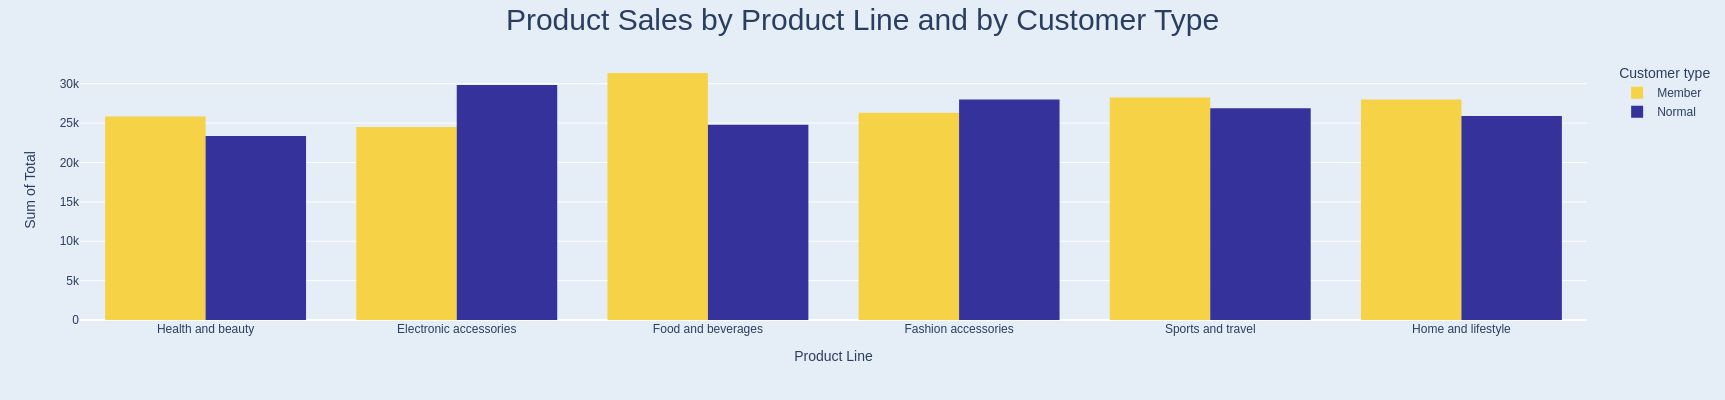

In [124]:
fig = px.histogram(df, x='Product line', y='Total', color='Customer type', barmode='group', histfunc='sum', color_discrete_sequence=['#f6d346','#35329b'])

fig.update_xaxes(title_text='Product Line')
fig.update_yaxes(title_text='Sum of Total')

fig.update_layout(template='plotly', height=400)

fig.update(
    layout_title_text='Product Sales by Product Line and by Customer Type',
    layout_title_font_size=30, 
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

### **d. Product Sales by Month or Week**

In [125]:
df_store = df.sort_values(by='Date').copy()

In [126]:
df_store['yyyy'] = pd.to_datetime(df_store['Date']).dt.year
df_store['mm'] = pd.to_datetime(df['Date']).dt.month
df_store['date_mon'] = df_store['yyyy'].astype(str) + '-' + df_store['mm'].astype(str)
df_store['day'] = pd.to_datetime(df_store['Date']).dt.day_name()
df_store['Hour'] = pd.to_datetime(df_store['Time']).dt.hour
df_store['Month'] = pd.to_datetime(df_store['Date']).dt.month_name()

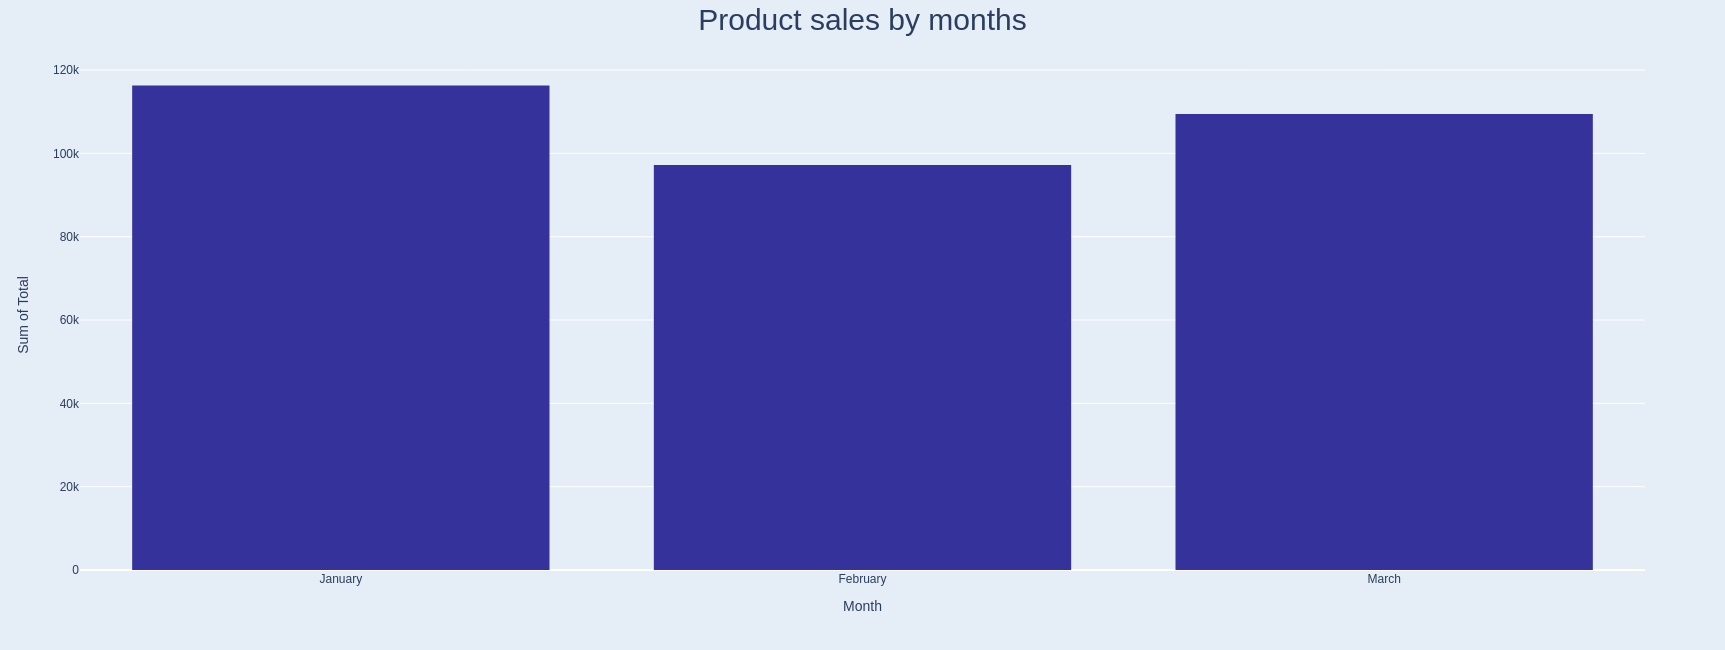

In [127]:
fig = px.histogram(df_store, x='Month', y='Total', color_discrete_sequence =['#35329b'])

fig.update_xaxes(title_text='Month')
fig.update_yaxes(title_text='Sum of Total')

fig.update_layout(template="plotly", height=650)

fig.update(
    layout_title_text="Product sales by months",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

### **e. Product Sales by Product Line and By Gender per Month or Week**

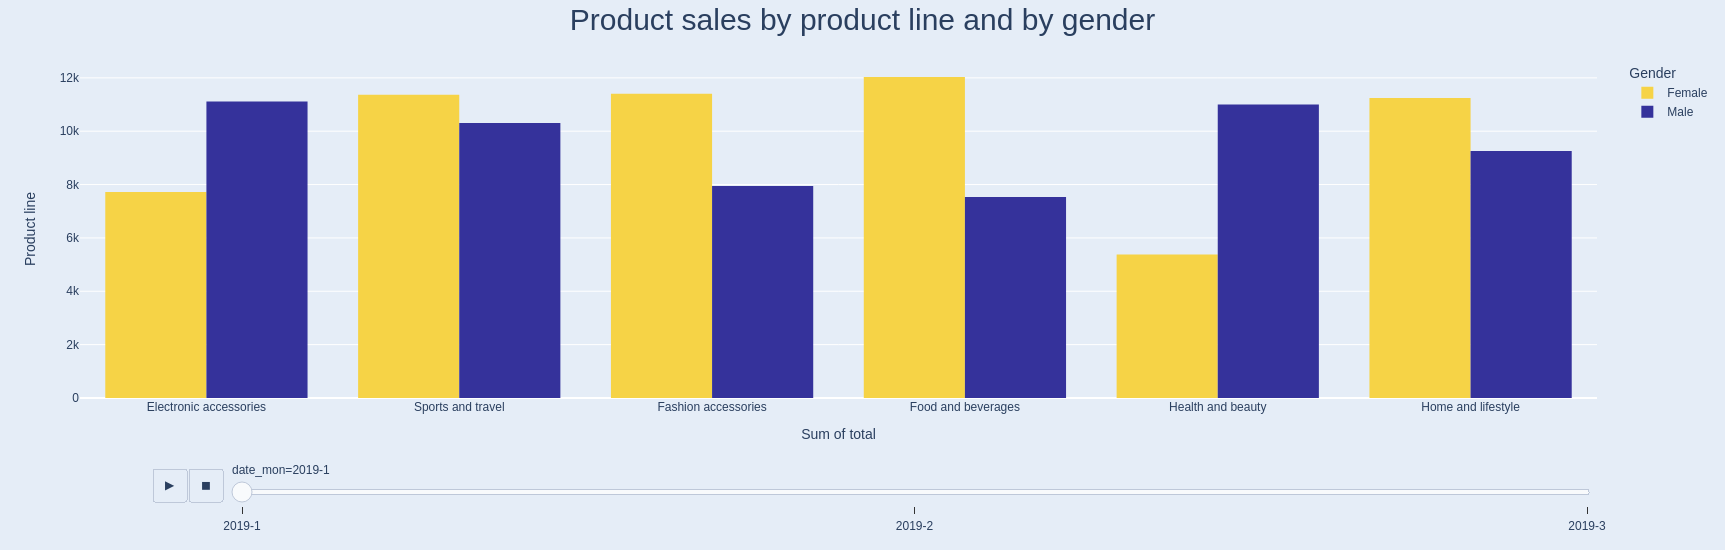

In [128]:
fig = px.histogram(
    df_store, x='Product line', y='Total', 
    color='Gender', barmode='group', 
    animation_frame='date_mon',
    histfunc='sum',  color_discrete_sequence =['#f6d346','#35329b'],
)

fig.update_xaxes(title_text="Sum of total")
fig.update_yaxes(title_text="Product line")

fig.update_layout(template='plotly', height=550)

fig.update(
    layout_title_text="Product sales by product line and by gender",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

### **f. Product Sales by Product Line and by Customer Type per Month or Week**

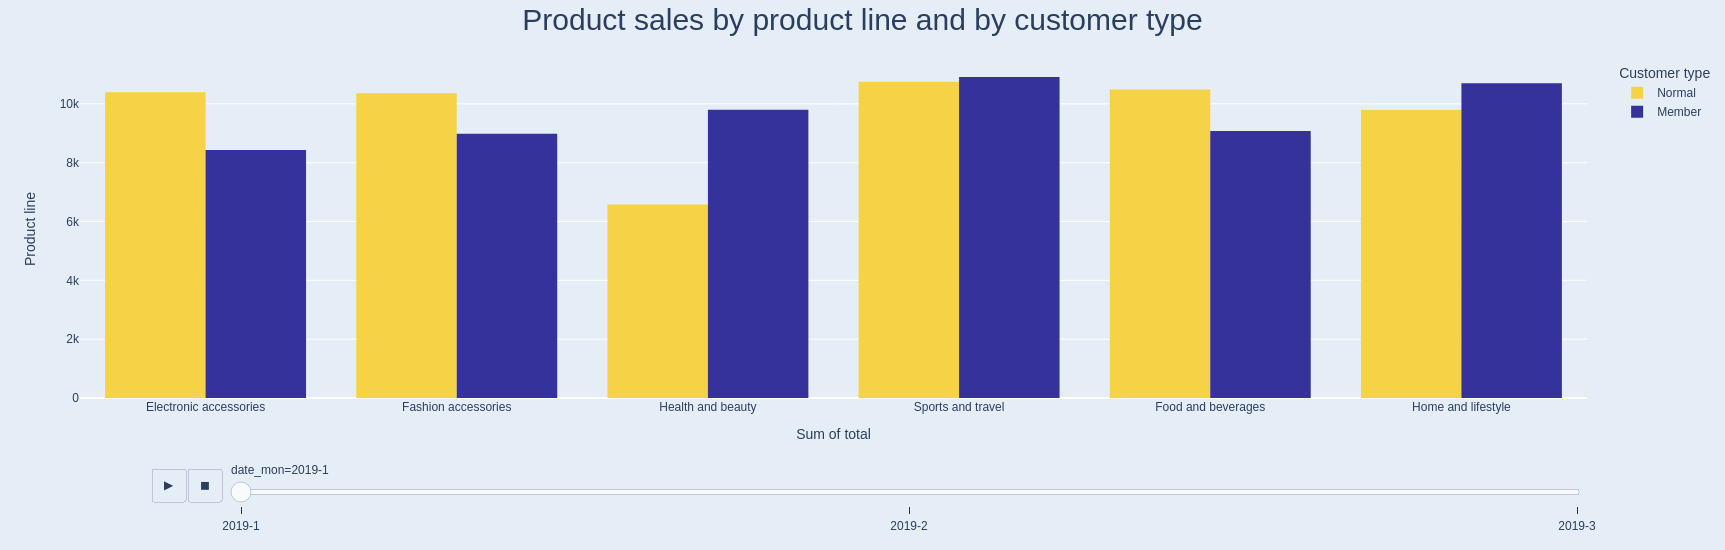

In [129]:
fig = px.histogram(
    df_store, x='Product line', y='Total', 
    color='Customer type', barmode='group', 
    animation_frame='date_mon',
    histfunc='sum',  color_discrete_sequence =['#f6d346','#35329b'],
)

fig.update_xaxes(title_text="Sum of total")
fig.update_yaxes(title_text="Product line")

fig.update_layout(template='plotly', height=550)

fig.update(
    layout_title_text="Product sales by product line and by customer type",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

### **g. Product Sales by Days**

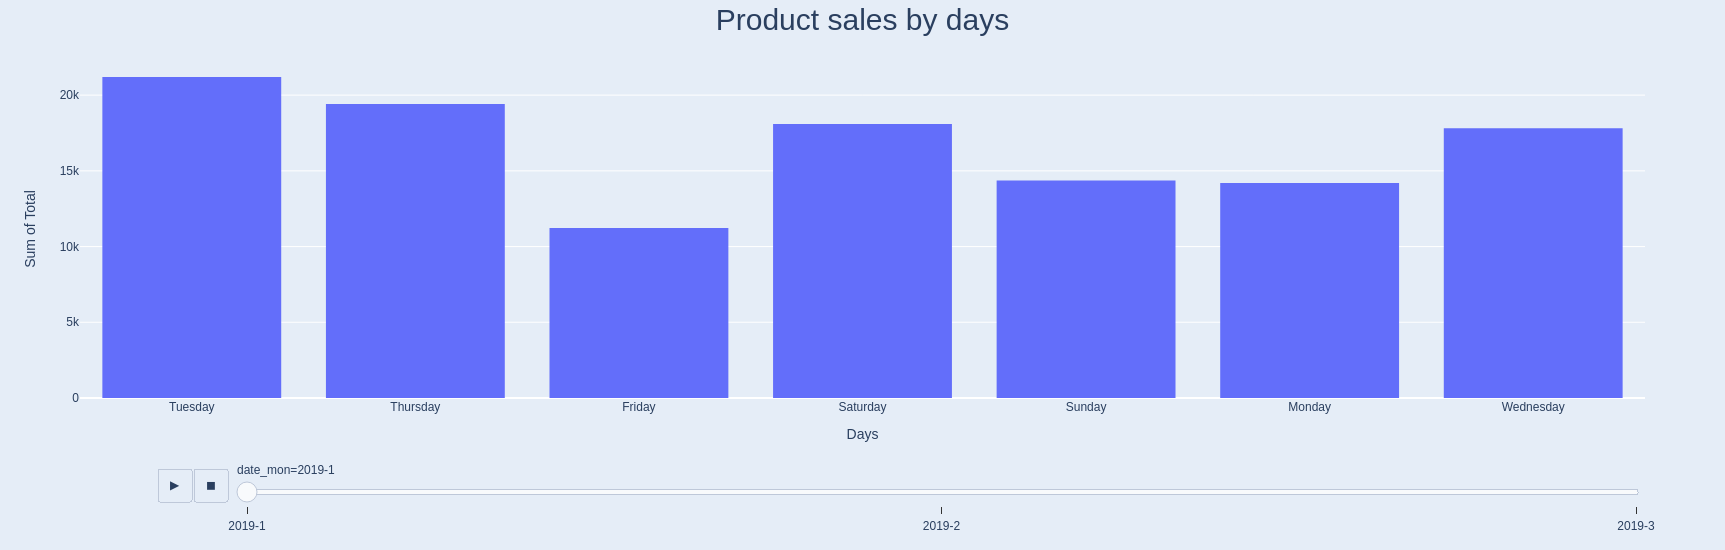

In [130]:
fig = px.histogram(df_store, y='Total', x='day', animation_frame='date_mon')

fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text="Sum of Total")

fig.update_layout(template='plotly', height=550)

fig.update(
    layout_title_text="Product sales by days",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

### **h. Product Sales by Days and by customer type**

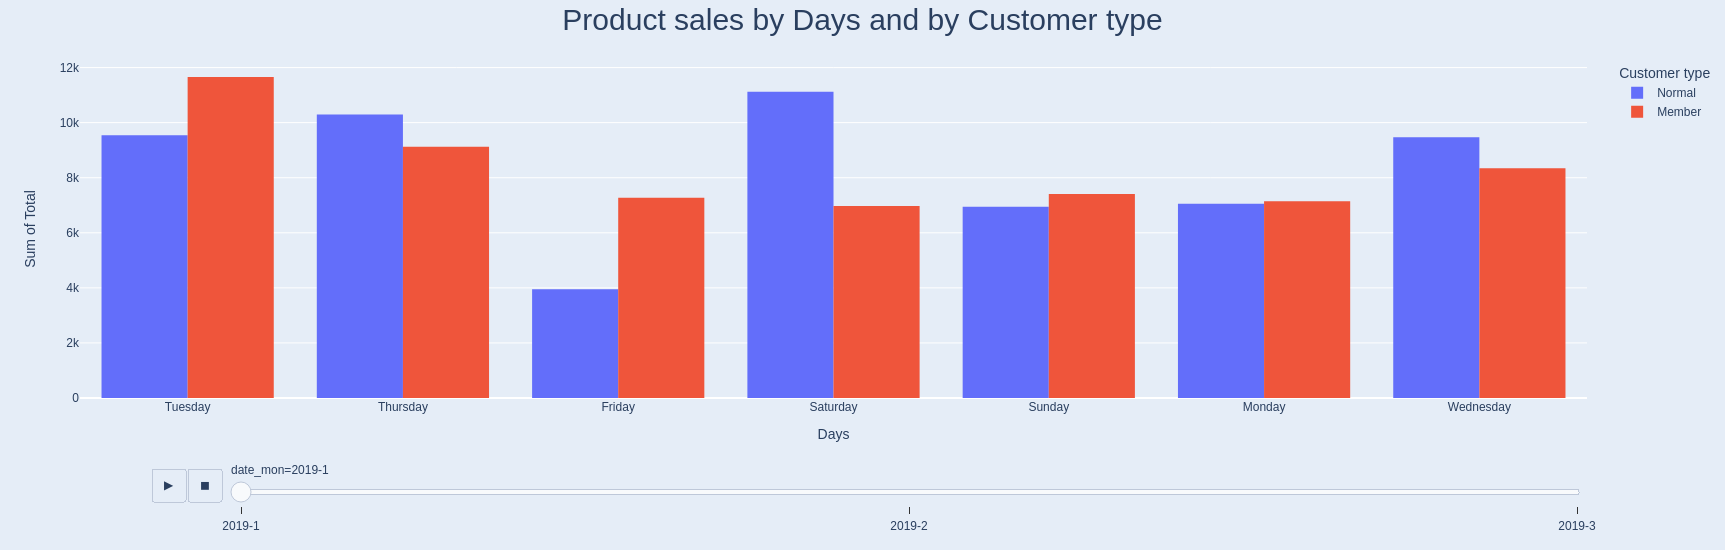

In [131]:
fig = px.histogram(
    df_store, x='day', y='Total', 
    color='Customer type', barmode='group',
    animation_frame='date_mon'
)

fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text="Sum of Total")

fig.update_layout(template='plotly', height=550)

fig.update(
    layout_title_text="Product sales by Days and by Customer type",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

### **i. Product Sales by Days and by Gender**

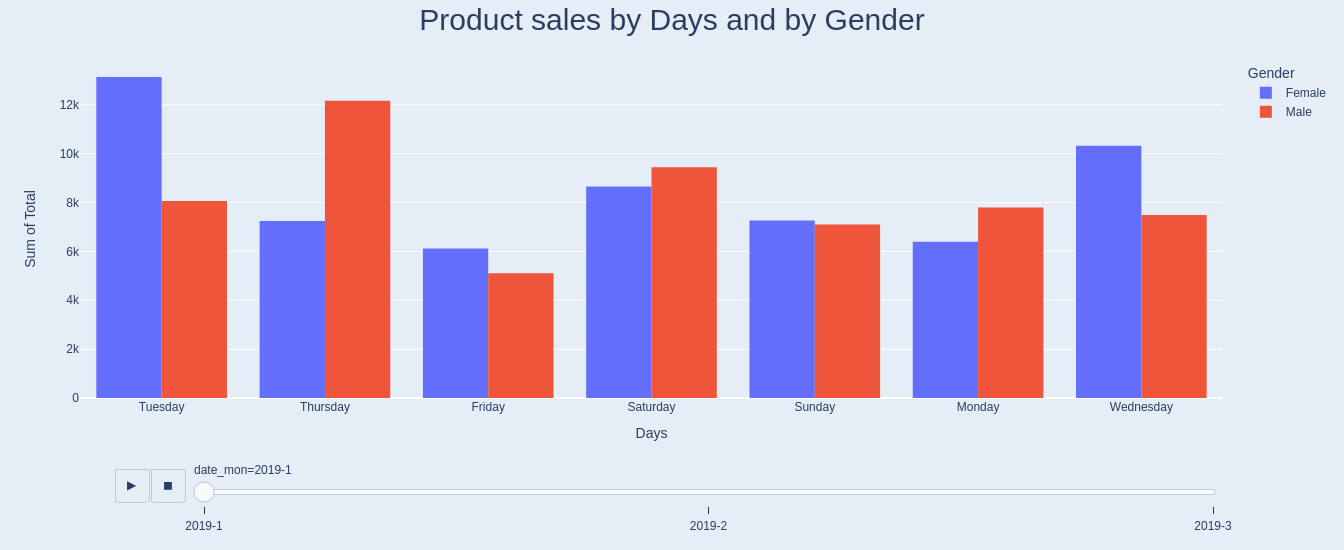

In [132]:
fig = px.histogram(
    df_store, x='day', y='Total', 
    color='Gender', barmode='group',
    animation_frame='date_mon'
)

fig.update_xaxes(title_text="Days")
fig.update_yaxes(title_text="Sum of Total")

fig.update_layout(template='plotly', height=550)

fig.update(
    layout_title_text="Product sales by Days and by Gender",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

### **j. Product Sales per Hour**

In [133]:
df_store.head()

Invoice ID Branch       City Customer type  Gender  \
496  556-97-7101      C  Naypyitaw        Normal  Female   
484  493-65-6248      C  Naypyitaw        Member  Female   
567  651-88-7328      A     Yangon        Normal  Female   
523  133-14-7229      C  Naypyitaw        Normal    Male   
970  746-04-1077      B   Mandalay        Member  Female   

               Product line  Unit price  Quantity  Tax 5%    Total  ...  \
496  Electronic accessories       63.22         2   6.322  132.762  ...   
484       Sports and travel       36.98        10  18.490  388.290  ...   
567     Fashion accessories       65.74         9  29.583  621.243  ...   
523       Health and beauty       62.87         2   6.287  132.027  ...   
970      Food and beverages       84.63        10  42.315  888.615  ...   

       cogs gross margin percentage gross income  Rating  yyyy  mm  date_mon  \
496  126.44                4.761905        6.322     8.5  2019   1    2019-1   
484  369.80                4.761905       18.490     7.0  2019   1    2019-1   
567  591.66                4.761905       29.583     7.7  2019   1    2019-1   
523  125.74                4.761905        6.287     5.0  2019   1    2019-1   
970  846.30                4.761905       42.315     9.0  2019   1    2019-1   

         day  Hour    Month  
496  Tuesday    15  January  
484  Tuesday    19  January  
567  Tuesday    13  January  
523  Tuesday    11  January  
970  Tuesday    11  January  

[5 rows x 23 columns]

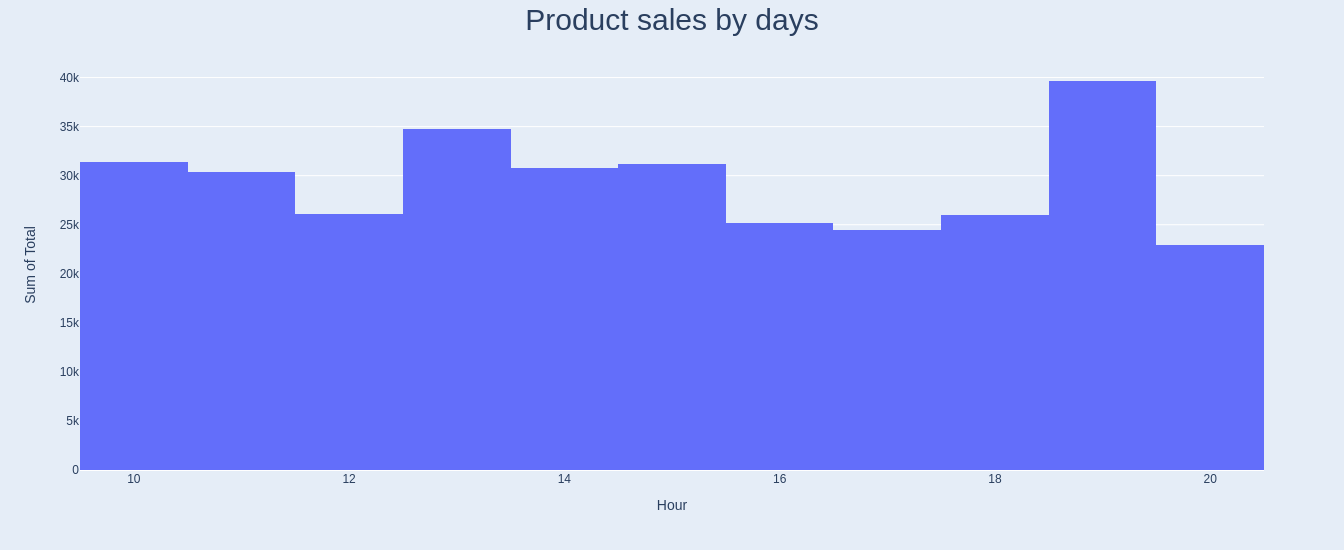

In [134]:
fig = px.histogram(df_store, x='Hour', y='Total')

fig.update_xaxes(title_text="Hour")
fig.update_yaxes(title_text="Sum of Total")

fig.update_layout(template='plotly', height=550)

fig.update(
    layout_title_text="Product sales by days",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

### **k. Product Sales by the Hour and by Gender** 

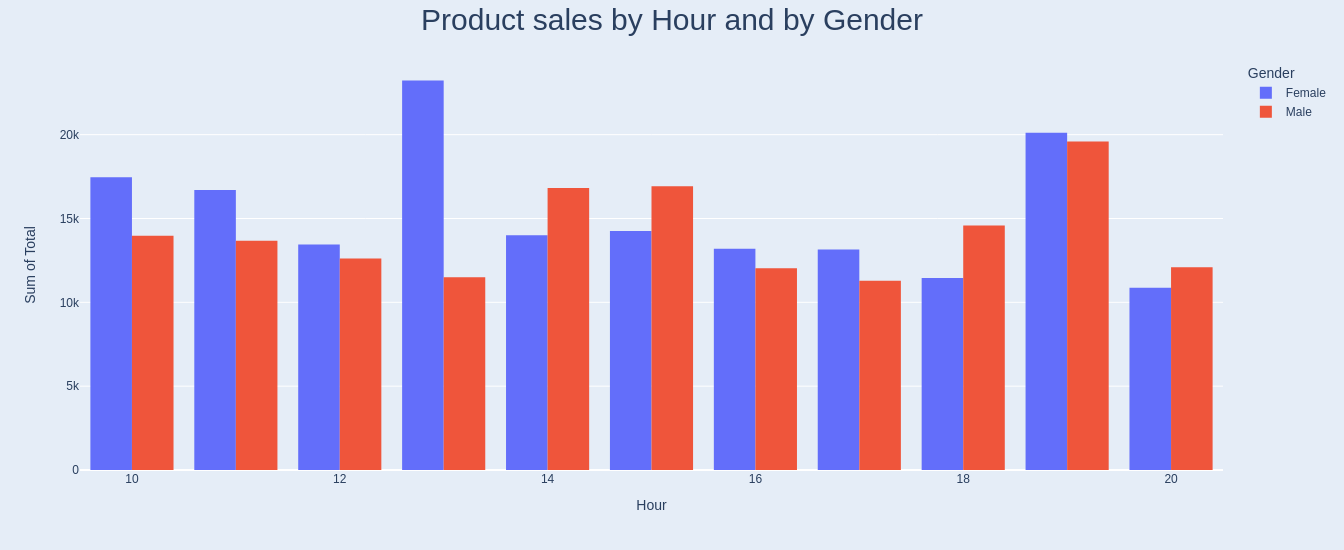

In [135]:
fig = px.histogram(df_store, x='Hour', y='Total', color='Gender', barmode='group')

fig.update_xaxes(title_text="Hour")
fig.update_yaxes(title_text="Sum of Total")

fig.update_layout(template='plotly', height=550)

fig.update(
    layout_title_text="Product sales by Hour and by Gender",
    layout_title_font_size=30,
    layout_title_x=0.5,
    layout_paper_bgcolor='rgb(229, 237, 247)',
    layout_plot_bgcolor='rgb(229, 237, 247)',
)

fig.show()

### **l. Quantity of Products sold by Products Line and by Customer Type**

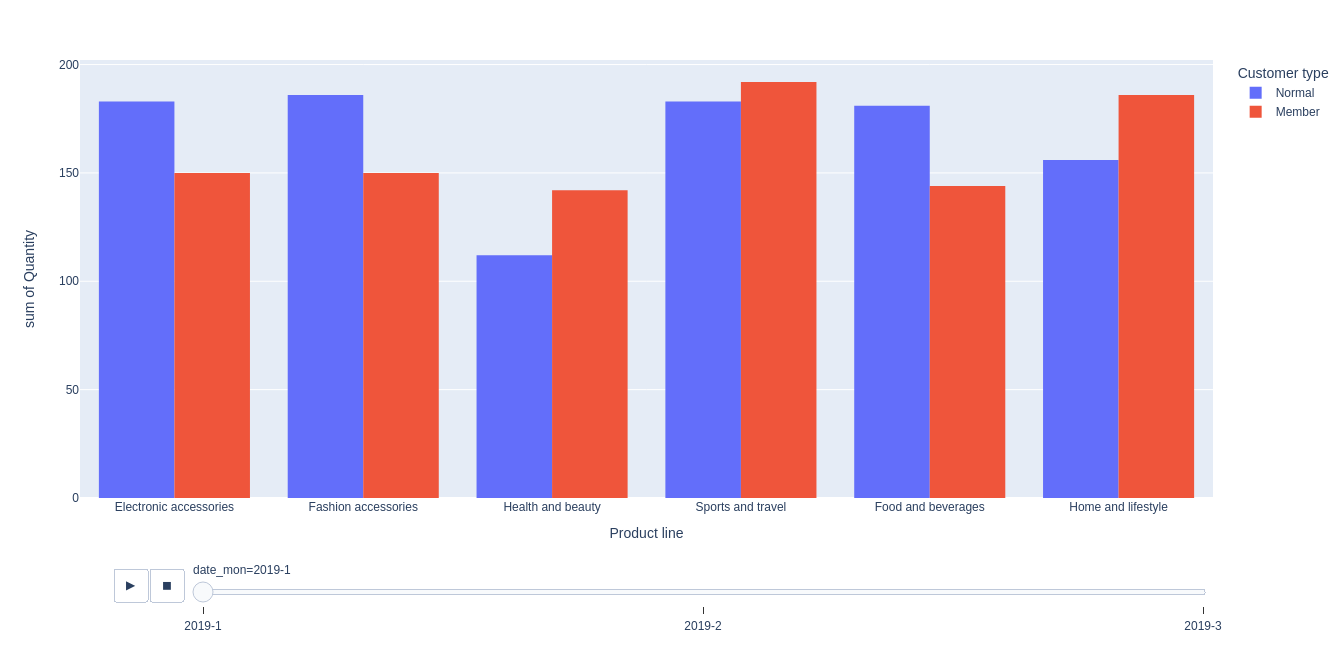

In [136]:
fig = px.histogram(df_store, x='Product line', y='Quantity', color='Customer type', barmode='group', animation_frame='date_mon')

fig.update_layout(height=650)

fig.show()

### **m. Quantity of Products sold by Product Line and by Customer Type per Month or Week**

### **n. Rata-rata Total pemasukan dari Kelompok Produk Pada satu bulan ini**

In [137]:
df_store.groupby(['Product line', 'Customer type'])['Total'].agg([np.mean, np.std, np.sum])

mean         std         sum
Product line           Customer type                                    
Electronic accessories Member         314.083269  249.554621  24498.4950
                       Normal         324.337353  244.114836  29839.0365
Fashion accessories    Member         306.092581  253.815834  26323.9620
                       Normal         304.151446  234.969692  27981.9330
Food and beverages     Member         333.591702  259.844399  31357.6200
                       Normal         309.840300  232.335075  24787.2240
Health and beauty      Member         353.849856  247.284873  25831.0395
                       Normal         295.730373  226.148991  23362.6995
Home and lifestyle     Member         337.084663  238.683905  27978.0270
                       Normal         336.154364  272.296368  25883.8860
Sports and travel      Member         324.532190  241.352791  28234.3005
                       Normal         340.361089  257.177122  26888.5260

### **o. Kumpulan ID yang menjadi Customer Memeber**

In [150]:
branch_A = df_store[df_store['Branch'] == 'C']
branch_A = branch_A[branch_A['Month'] == 'January']
branch_A = branch_A[['Invoice ID', 'Date', 'Time', 'Customer type', 'Gender','Product line', 'Quantity', 'Total']]

branch_A['Tanggal'] = branch_A['Date'] + ' ' + branch_A['Time']

branch_A = branch_A[['Invoice ID', 'Tanggal', 'Customer type', 'Gender','Product line', 'Quantity', 'Total']]
branch_A.head()

Invoice ID          Tanggal Customer type  Gender  \
496  556-97-7101   1/1/2019 15:51        Normal  Female   
484  493-65-6248   1/1/2019 19:48        Member  Female   
523  133-14-7229   1/1/2019 11:43        Normal    Male   
839  271-77-8740   1/1/2019 11:40        Member  Female   
923  887-42-0517  1/10/2019 10:31        Normal  Female   

               Product line  Quantity    Total  
496  Electronic accessories         2  132.762  
484       Sports and travel        10  388.290  
523       Health and beauty         2  132.027  
839       Sports and travel         6  184.086  
923       Sports and travel         7  611.079